In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data_tr=scipy.io.loadmat('data_train.mat')
data_te=scipy.io.loadmat('data_test.mat')
label_tr=scipy.io.loadmat('label_train.mat')

print(data_tr.keys())
X=data_tr['data_train']
print(X.shape)

print(label_tr.keys())
y=label_tr['label_train']
print(y.shape)

dict_keys(['__header__', '__version__', '__globals__', 'data_train'])
(301, 33)
dict_keys(['__header__', '__version__', '__globals__', 'label_train'])
(301, 1)


## Input Layer
Since the train data have 33 features, the input layer should have 33 neurons.

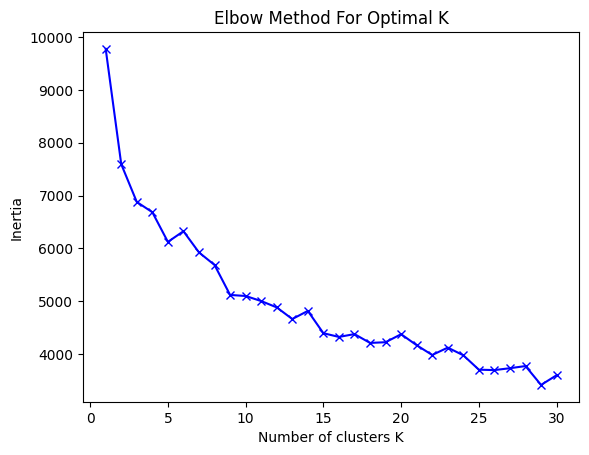

In [ ]:
## Neuron centres selection
## Kmeans method
class ncs_Kmeans:
    def __init__ (self, X, n_clusters, max_iters=10000):
        ##standerlize
        self.X=(X-X.mean(axis=0))/X.std(axis=0)
        self.n_clusters=n_clusters
        self.max_iters=max_iters
        self.n_samples, n_features=X.shape

    def distance(self, a, b):
        return np.linalg.norm(a-b, axis=1)
    
    def fit(self):
        ##randomly select initial centres
        random_indices=np.random.choice(self.n_samples, self.n_clusters, replace=False)
        self.centres=self.X[random_indices]

        for _ in range(self.max_iters):
            #assign clusters
            clusters=[]
            for x in self.X:
                distances=self.distance(x, self.centres)
                cluster=np.argmin(distances)
                clusters.append(cluster)
            clusters=np.array(clusters)

            #update centres
            new_centres=[]
            for i in range(self.n_clusters):
                points=self.X[clusters==i]
                new_centre=points.mean(axis=0)
                new_centres.append(new_centre)
            new_centres=np.array(new_centres)

            #check convergence
            if np.all(self.centres==new_centres):
                break
            self.centres=new_centres

        self.clusters=clusters
        return self.centres, self.clusters
## elbow method to select number of clusters  
inertias=[]
K=range(1,31)
for k in K:
    kmeans=ncs_Kmeans(X, n_clusters=k)
    centres, clusters=kmeans.fit()
    inertia=0
    for i in range(k):
        points=X[clusters==i]
        inertia+=np.sum((points - centres[i])**2)
    inertias.append(inertia)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()